In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
from showit import image, tile
from pyspark import SparkContext,SparkConf
import thunder as td

In [20]:
conf = SparkConf().setAppName("image")
sc = SparkContext.getOrCreate(conf=conf)
data = td.images.fromexample('fish',engine=sc)
sc

<SparkContext master=local[*] appName=image>

In [11]:
data.shape

(20, 2, 76, 87)

In [12]:
project=data.max_projection(axis=0)

In [13]:
type(project)

thunder.images.images.Images

In [14]:
image_array = project.toarray()
image_array

array([[[26, 26, 26, ..., 26, 26, 26],
        [26, 26, 26, ..., 26, 26, 26],
        [26, 26, 26, ..., 27, 27, 26],
        ...,
        [26, 26, 26, ..., 27, 27, 26],
        [26, 26, 26, ..., 27, 26, 26],
        [25, 25, 25, ..., 26, 26, 26]],

       [[26, 26, 25, ..., 26, 26, 26],
        [26, 26, 26, ..., 26, 26, 26],
        [26, 26, 26, ..., 27, 27, 26],
        ...,
        [26, 26, 26, ..., 27, 27, 26],
        [26, 26, 26, ..., 27, 26, 26],
        [25, 25, 25, ..., 26, 26, 26]],

       [[26, 26, 26, ..., 26, 26, 26],
        [26, 26, 26, ..., 26, 26, 26],
        [26, 26, 26, ..., 27, 27, 26],
        ...,
        [26, 26, 26, ..., 27, 27, 26],
        [26, 26, 26, ..., 27, 26, 26],
        [25, 25, 25, ..., 26, 26, 26]],

       ...,

       [[26, 26, 25, ..., 26, 26, 26],
        [26, 26, 26, ..., 26, 26, 26],
        [26, 26, 26, ..., 27, 27, 26],
        ...,
        [26, 26, 26, ..., 27, 27, 26],
        [26, 26, 26, ..., 27, 26, 26],
        [25, 25, 25, ..., 26, 26

In [19]:
from pyspark import SparkContext,SparkConf
conf = SparkConf().setAppName("image")
sc = SparkContext.getOrCreate(conf=conf)
sc.stop()

In [15]:
image.shape

AttributeError: 'function' object has no attribute 'shape'

In [16]:
image=image_array[0]

In [17]:
type(image)

numpy.ndarray

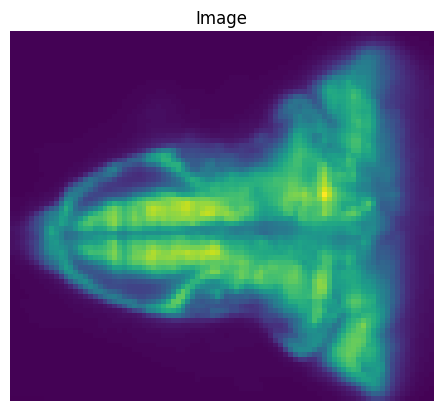

In [18]:
plt.imshow(image)
plt.title(f"Image")
plt.axis('off')
plt.show()

In [8]:
for i,img in enumerate(image_array):
    plt.imsave(f'img/image_{i}.jpg',img)

In [108]:
from PIL import Image
import extcolors

extracted_colors={}
for i, img_array in enumerate(image_array):
    img_pil = Image.fromarray(img_array)  # Chuyển đổi mảng numpy thành ảnh PIL
    # plt.imshow(img_pil)
    colors_x = extcolors.extract_from_image(img_pil, tolerance=12, limit=12)  # Trích xuất màu sắc
    extracted_colors[f'image_{i}'] = colors_x  # Lưu trữ kết quả trích xuất màu sắc trong từ điển
    print(colors_x)

([((26, 26, 26), 3665), ((107, 107, 107), 2055), ((64, 64, 64), 838), ((140, 140, 140), 54)], 6612)
([((26, 26, 26), 3660), ((91, 91, 91), 2195), ((122, 122, 122), 388), ((58, 58, 58), 369)], 6612)
([((26, 26, 26), 3671), ((104, 104, 104), 2140), ((52, 52, 52), 741), ((136, 136, 136), 60)], 6612)
([((26, 26, 26), 3678), ((107, 107, 107), 2089), ((52, 52, 52), 834), ((138, 138, 138), 11)], 6612)
([((26, 26, 26), 3692), ((107, 107, 107), 2082), ((57, 57, 57), 830), ((139, 139, 139), 8)], 6612)
([((26, 26, 26), 3694), ((103, 103, 103), 2191), ((56, 56, 56), 705), ((135, 135, 135), 22)], 6612)
([((26, 26, 26), 3699), ((98, 98, 98), 2233), ((68, 68, 68), 565), ((129, 129, 129), 115)], 6612)
([((26, 26, 26), 3699), ((90, 90, 90), 2244), ((57, 57, 57), 341), ((122, 122, 122), 328)], 6612)
([((26, 26, 26), 3697), ((92, 92, 92), 2303), ((57, 57, 57), 372), ((122, 122, 122), 240)], 6612)
([((26, 26, 26), 3698), ((93, 93, 93), 2298), ((57, 57, 57), 408), ((123, 123, 123), 208)], 6612)
([((26, 26,

In [109]:

import os
import matplotlib.pyplot as plt
from PIL import Image
import extcolors

# Directory containing images
image_dir = '/home/minhgiang/image_processing/img'

# Initialize dictionary to store extracted colors
extracted_colors = {}

# Iterate over the images in the directory
for i, img_file in enumerate(os.listdir(image_dir)):
    # Ensure only image files are processed
    if img_file.endswith(('.png', '.jpg', '.jpeg')):
        # Construct the full path to the image
        img_path = os.path.join(image_dir, img_file)
        
        # Load the image and convert it to RGB mode
        img_pil = Image.open(img_path).convert('RGB')
    
        
        # Extract colors with the specified tolerance and limit
        colors_x = extcolors.extract_from_image(img_pil, tolerance=25, limit=12)
        
        # Store the extracted colors in the dictionary
        extracted_colors[f'image_{i}'] = colors_x
        
        # Print the extracted colors
        print(f'Extracted colors from {img_file}: {colors_x}')

Extracted colors from image_0.jpg: ([((67, 2, 84), 3569), ((35, 129, 129), 1245), ((43, 174, 143), 627), ((64, 67, 134), 576), ((106, 206, 94), 438), ((47, 100, 140), 142), ((192, 244, 97), 15)], 6612)
Extracted colors from image_12.jpg: ([((68, 2, 89), 3463), ((58, 192, 131), 1177), ((40, 105, 123), 680), ((64, 69, 133), 569), ((105, 215, 100), 347), ((39, 149, 138), 238), ((169, 232, 63), 138)], 6612)
Extracted colors from image_5.jpg: ([((68, 2, 89), 3457), ((32, 142, 141), 1024), ((52, 185, 132), 790), ((62, 71, 136), 568), ((117, 215, 80), 547), ((44, 103, 143), 167), ((191, 228, 60), 59)], 6612)
Extracted colors from image_13.jpg: ([((68, 2, 89), 3476), ((34, 146, 122), 1084), ((89, 206, 117), 860), ((64, 70, 132), 581), ((39, 115, 139), 371), ((187, 215, 42), 228), ((123, 212, 68), 12)], 6612)
Extracted colors from image_16.jpg: ([((67, 2, 84), 3678), ((36, 145, 139), 1515), ((59, 91, 138), 1075), ((40, 177, 125), 319), ((126, 228, 116), 23), ((65, 62, 143), 2)], 6612)
Extracted

In [110]:
from PIL import Image

img=Image.fromarray(image)


In [111]:
import pandas as pd
from colormap import rgb2hex

def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_dict = {key: color_to_df(colors) for key, colors in extracted_colors.items()}

# In ra DataFrame để kiểm tra
for key, df in df_dict.items():
    print(f"DataFrame for {key}:")
    print(df)

DataFrame for image_0:
    c_code occurence
0  #430254      3569
1  #238181      1245
2  #2BAE8F       627
3  #404386       576
4  #6ACE5E       438
5  #2F648C       142
DataFrame for image_1:
    c_code occurence
0  #440259      3463
1  #3AC083      1177
2  #28697B       680
3  #404585       569
4  #69D764       347
5  #27958A       238
DataFrame for image_2:
    c_code occurence
0  #440259      3457
1  #208E8D      1024
2  #34B984       790
3  #3E4788       568
4  #75D750       547
5  #2C678F       167
DataFrame for image_3:
    c_code occurence
0  #440259      3476
1  #22927A      1084
2  #59CE75       860
3  #404684       581
4  #27738B       371
5  #BBD72A       228
DataFrame for image_4:
    c_code occurence
0  #430254      3678
1  #24918B      1515
2  #3B5B8A      1075
3  #28B17D       319
4  #7EE474        23
DataFrame for image_5:
    c_code occurence
0  #440259      3469
1  #1F8D8C      1037
2  #23AA7F       665
3  #84D74B       659
4  #414688       555
5  #326383       181
6

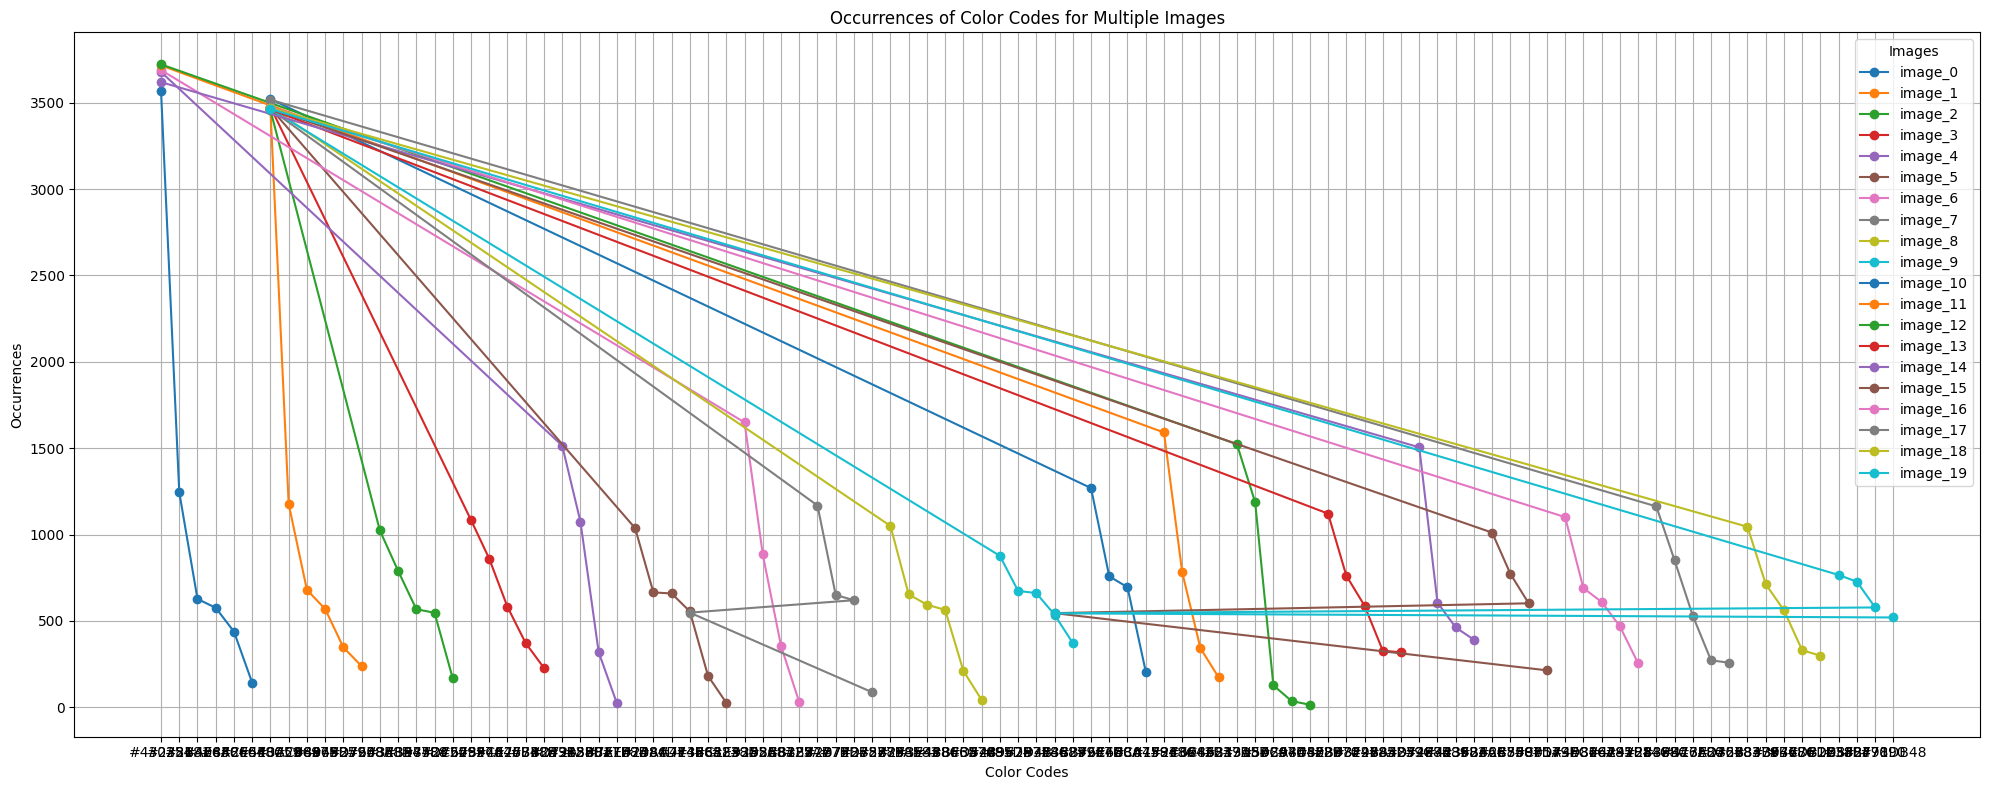

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))

for key, df in df_dict.items():
    color_codes = df['c_code'].tolist()
    occurrences = df['occurence'].tolist()
    occurrences = [int(num_str) for num_str in occurrences]

    # Vẽ biểu đồ đường
    plt.plot(color_codes, occurrences, marker='o', linestyle='-', label=key)

# Thêm nhãn và tiêu đề
plt.xlabel('Color Codes')
plt.ylabel('Occurrences')
plt.title('Occurrences of Color Codes for Multiple Images')

# Hiển thị chú thích
plt.legend(title='Images')

# Hiển thị biểu đồ
plt.grid(True)
plt.tight_layout()
plt.show()

In [76]:
# Tổng hợp dữ liệu từ các DataFrame
combined_df = pd.concat(df_dict.values(), ignore_index=True)

# Tính tổng số lần xuất hiện của mỗi mã màu
final_df = combined_df.groupby('c_code').sum().reset_index()
top_10_colors = final_df.sort_values(by='occurence', ascending=False).head(20)
print(top_10_colors)


     c_code occurence
6   #24967F       877
11  #27877B        87
26  #39B77A       851
23  #34B984       790
13  #287587       772
0   #1D8F87       766
25  #38B478       727
22  #34B07C       713
45  #85DD4B       674
5   #23AA7F       665
15  #29738C       661
44  #84D74B       659
20  #2FA583       654
12  #28728F       650
16  #2BAE8F       627
42  #7BD35B       620
38  #50C05A       602
30  #3E4886       594
19  #2F7090       578
32  #404386       576


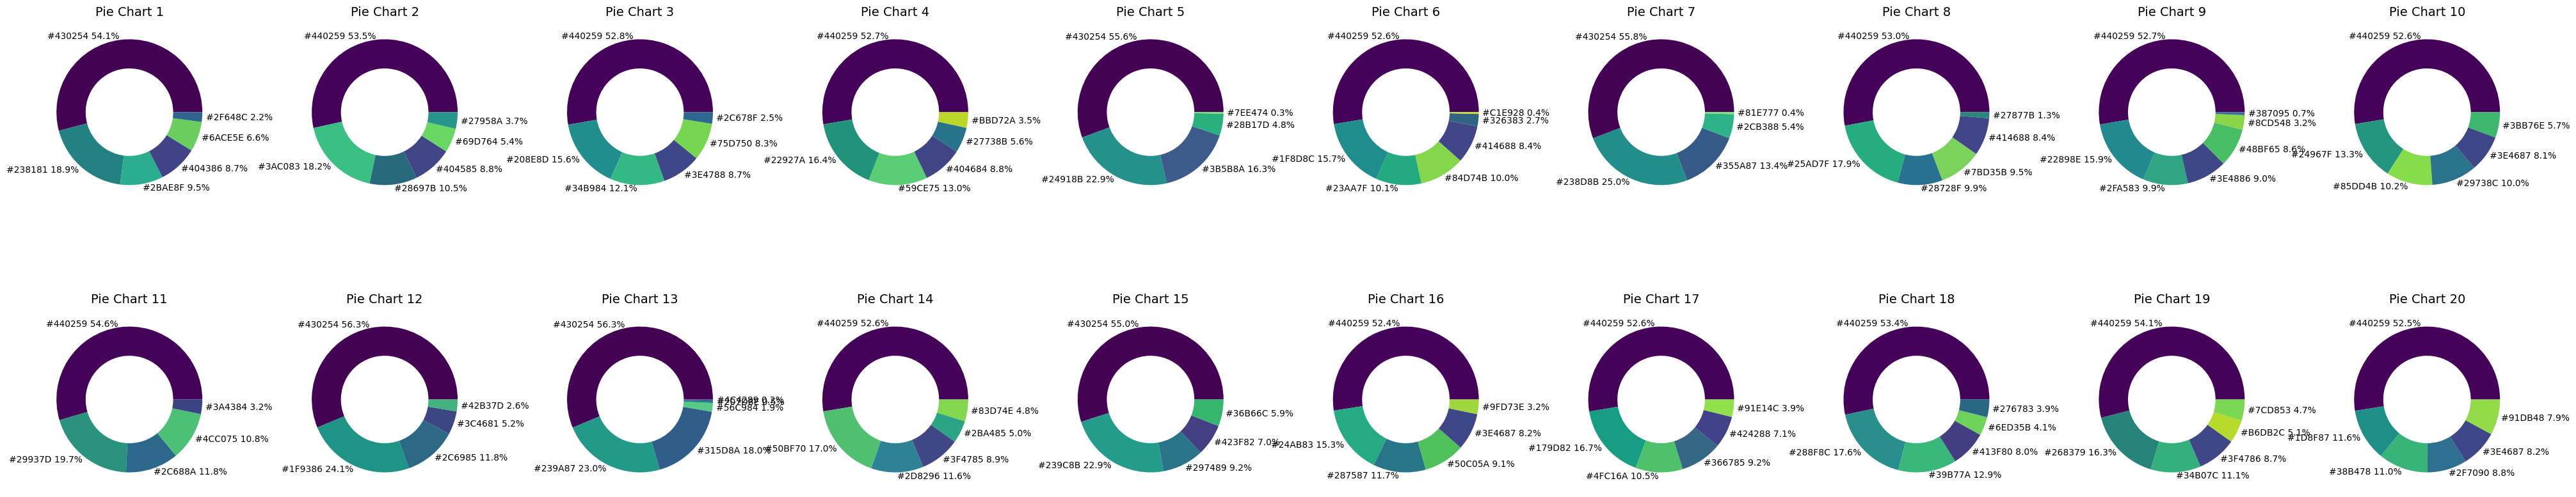

In [125]:
import matplotlib.pyplot as plt

# Number of DataFrames in df_dict
num_dfs = len(df_dict)

# Number of rows and columns for subplots
num_cols = 10
num_rows = (num_dfs + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create figure with subplots arranged in 2 rows and 10 columns
fig, axs = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows), dpi=100)
fig.set_facecolor('white')

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each DataFrame in df_dict and plot each pie chart into its respective subplot
for idx, (ax, (key, df)) in enumerate(zip(axs, df_dict.items())):
    list_color = list(df['c_code'])
    list_percent = [int(i) for i in list(df['occurence'])]
    text_c = [c + ' ' + str(round(p * 100 / sum(list_percent), 1)) + '%' for c, p in zip(list_color, list_percent)]

    # Plot pie chart for each DataFrame on each axis
    wedges, text = ax.pie(list_percent,
                          labels=text_c,
                          labeldistance=1.05,
                          colors=list_color,
                          textprops={'fontsize': 10, 'color': 'black'})  # Reduce fontsize

    plt.setp(wedges, width=0.4)  # Set the width of wedges
    ax.set_aspect("equal")
    ax.set_title(f'Pie Chart {idx + 1}', fontsize=14)  # Set title for each subplot

# Turn off any unused subplots
for ax in axs[num_dfs:]:
    ax.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Display the final image
plt.show()


In [78]:
type(df_dict)

dict

In [66]:
import pixellib
from pixellib.tune_bg import alter_bg
change_bg = alter_bg(model_type = "pb")


2024-07-06 15:45:14.189741: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-06 15:45:14.204683: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-06 15:45:14.265851: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-06 15:45:14.335785: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-06 15:45:14.411543: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [67]:
change_bg.load_pascalvoc_model("/home/minhgiang/image_processing/xception_pascalvoc.pb")


In [71]:
bg_path=f"{image_dir}/{img_file}"
selfier_path="/home/minhgiang/image_processing/selfies.jpg"
for i, img_file in enumerate(os.listdir(image_dir)):
    change_bg.change_bg_img(f_image_path = selfier_path,b_image_path = bg_path, output_image_name=f"/home/minhgiang/image_processing/img/new_img_{i}.jpg")

In [ ]:

img = Image.open('/home/minhgiang/image_processing/img/new_img_0.jpg')
plt.axis('off')
plt.imshow(img)


In [12]:
image=image_array[0]

Resize background theo image

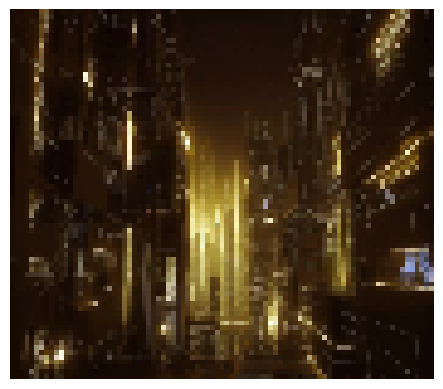

In [13]:
import cv2
import numpy as np

background = cv2.imread('/home/minhgiang/image_processing/fish.jpg')
background = cv2.resize(background, (image.shape[1], image.shape[0]))
plt.axis('off')
plt.imshow(background)



In [ ]:
plt.axis('off')
plt.imshow(image)

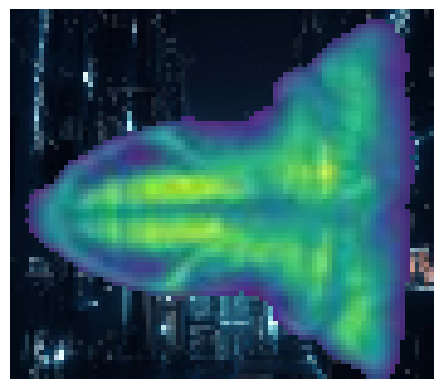

In [105]:
    
_, mask = cv2.threshold(image, 40, 255, cv2.THRESH_BINARY)
mask = mask.astype(np.uint8)
inverted_mask = cv2.bitwise_not(mask)
mask_3channel = cv2.merge([mask, mask, mask])
inverted_mask_3channel = cv2.merge([inverted_mask, inverted_mask,inverted_mask])
background = cv2.imread('/home/minhgiang/image_processing/fish.jpg')
background = cv2.resize(background, (image.shape[1], image.shape[0]))
image_mask_3channel = cv2.imread('/home/minhgiang/image_processing/fish/image_0.jpg')
foreground_masked = cv2.bitwise_and(image_mask_3channel, mask_3channel)
background_masked = cv2.bitwise_and(background, inverted_mask_3channel)
# Combine the masked foreground and background
combined = cv2.add(foreground_masked, background_masked)
combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(combined_rgb)

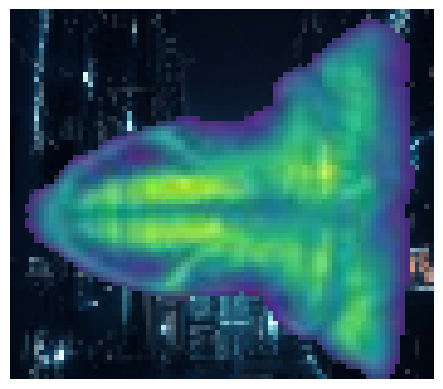

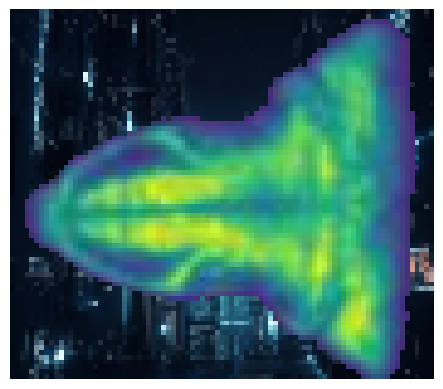

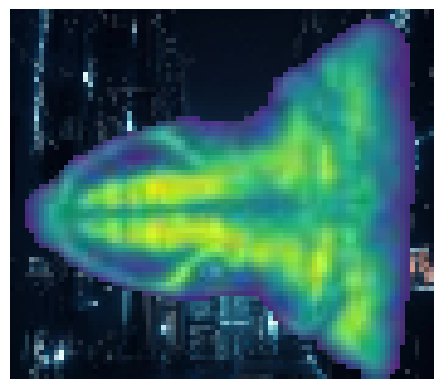

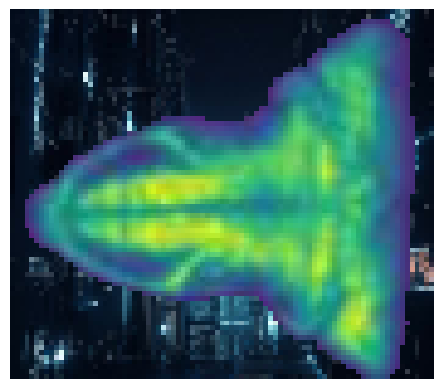

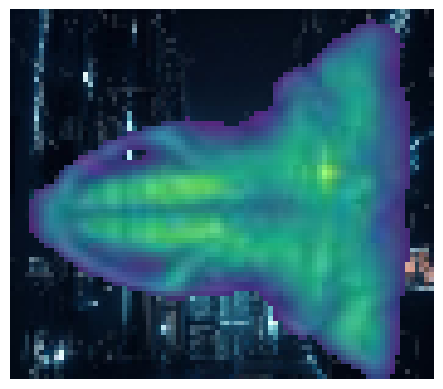

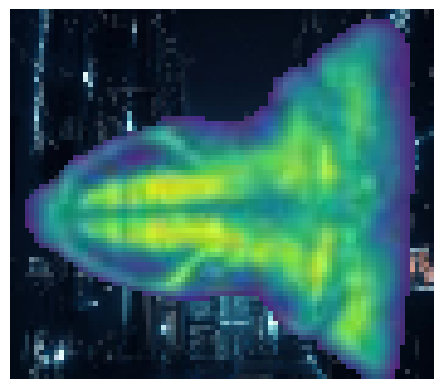

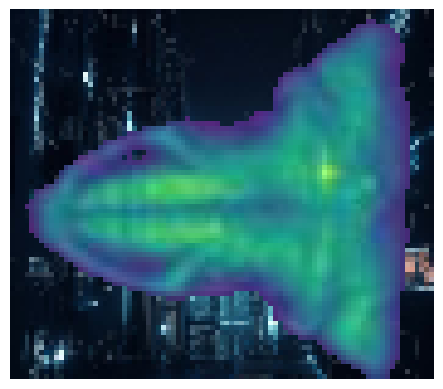

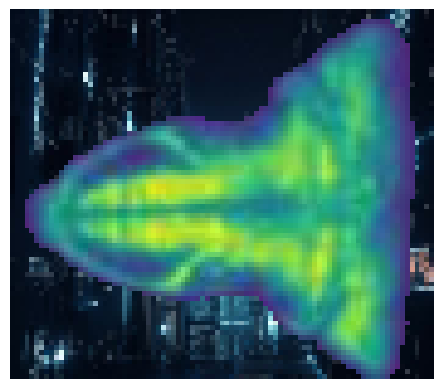

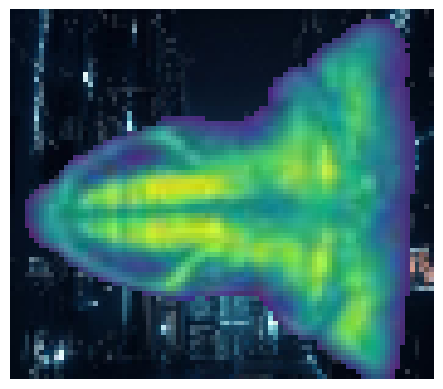

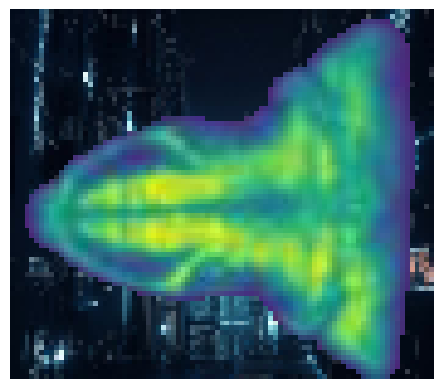

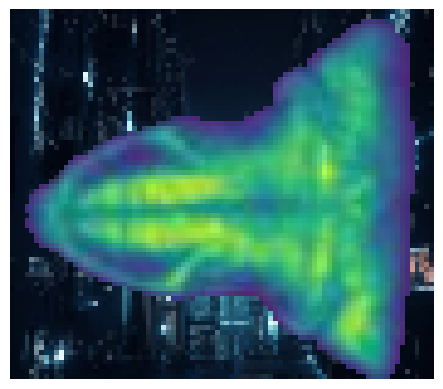

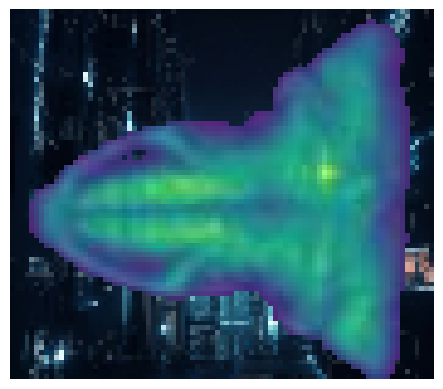

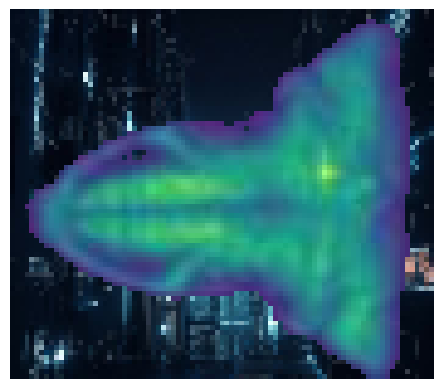

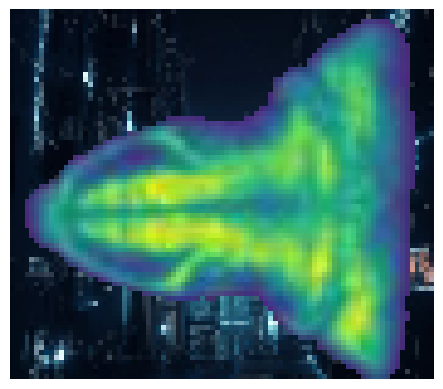

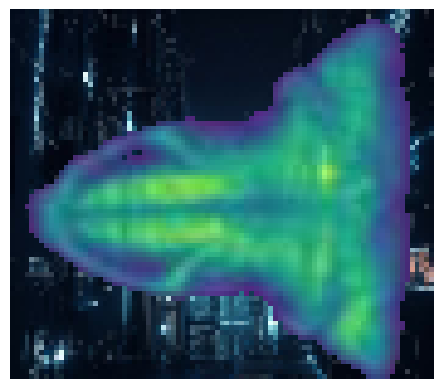

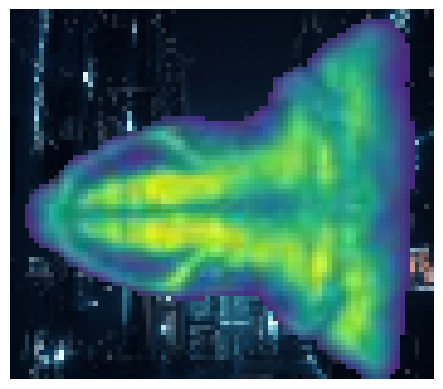

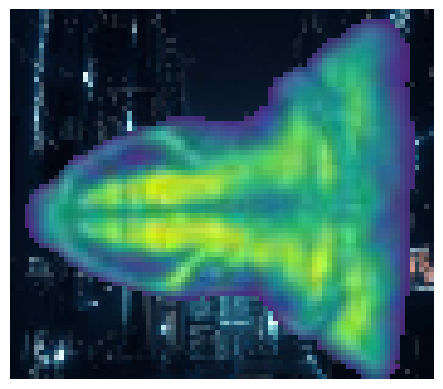

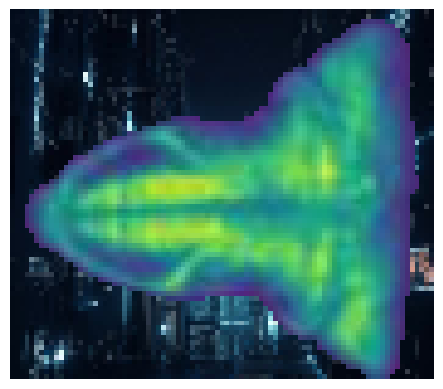

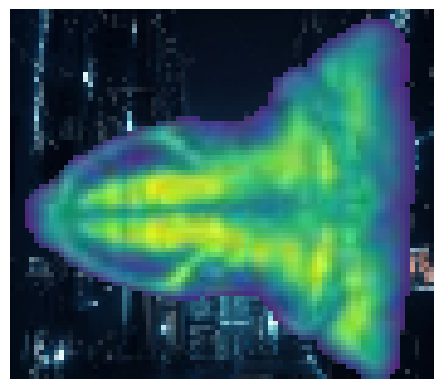

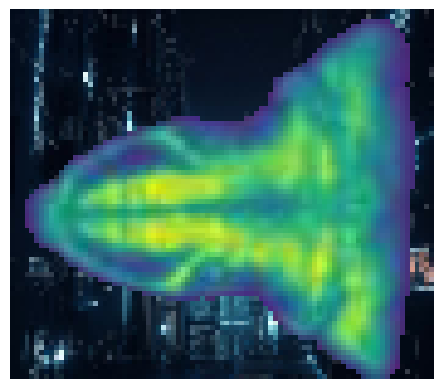

In [9]:
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt

def process_and_combine_images(foreground_folder, background_path, output_folder):
    # Load the background image
    background = cv2.imread(background_path)
    
    # Get all image paths from the foreground folder
    image_paths = glob.glob(f"{foreground_folder}/*.jpg")

    # Process each image
    for idx, image_path in enumerate(image_paths[:20]):
        # Load the foreground image
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        color_image = cv2.imread(image_path)

        # Create binary mask of the foreground
        _, mask = cv2.threshold(image, 58, 255, cv2.THRESH_BINARY)
        mask = mask.astype(np.uint8)
        inverted_mask = cv2.bitwise_not(mask)

        # Convert masks to 3 channels
        mask_3channel = cv2.merge([mask, mask, mask])
        inverted_mask_3channel = cv2.merge([inverted_mask, inverted_mask, inverted_mask])

        # Resize background to match the size of the foreground image
        resized_background = cv2.resize(background, (image.shape[1], image.shape[0]))

        # Apply masks to the foreground and background images
        foreground_masked = cv2.bitwise_and(color_image, mask_3channel)
        background_masked = cv2.bitwise_and(resized_background, inverted_mask_3channel)

        # Combine the masked foreground and background
        combined = cv2.add(foreground_masked, background_masked)
        combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)

        # Save and display the combined image
        output_path = f"{output_folder}/result_{idx}.jpg"
        cv2.imwrite(output_path, combined)

        plt.figure()
        plt.axis('off')
        plt.imshow(combined_rgb)
        # plt.title(f'Combined Image {idx + 1}')
        # plt.show()

# Example usage
foreground_folder = '/home/minhgiang/image_processing/img'
background_path = '/home/minhgiang/image_processing/fish.jpg'
output_folder = '/home/minhgiang/image_processing/output'

process_and_combine_images(foreground_folder, background_path, output_folder)


In [26]:
image.shape

(76, 87)

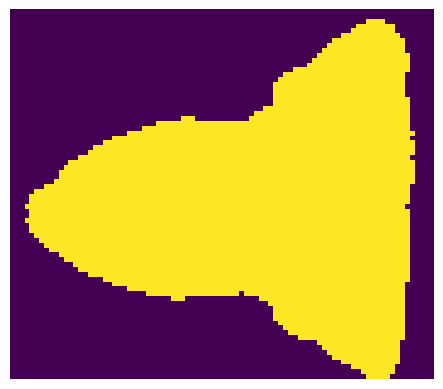

In [80]:
_, mask = cv2.threshold(image, 40, 255, cv2.THRESH_BINARY)
plt.axis('off')
plt.imshow(mask)

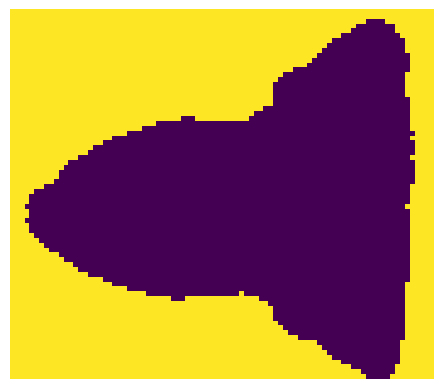

In [81]:
mask = mask.astype(np.uint8)
inverted_mask = cv2.bitwise_not(mask)
plt.axis('off')
plt.imshow(inverted_mask)


In [101]:
mask_3channel = cv2.merge([mask, mask, mask])
inverted_mask_3channel = cv2.merge([inverted_mask, inverted_mask,inverted_mask])

In [90]:
type(image)

numpy.ndarray

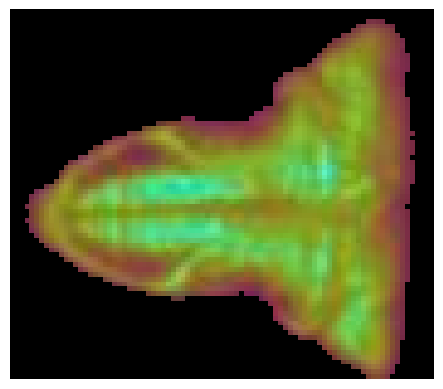

In [99]:
background = cv2.imread('/home/minhgiang/image_processing/fish.jpg')
background = cv2.resize(background, (image.shape[1], image.shape[0]))
image_mask_3channel = cv2.imread('/home/minhgiang/image_processing/fish/image_0.jpg')


foreground_masked = cv2.bitwise_and(image_mask_3channel, mask_3channel)
plt.axis('off')
plt.imshow(foreground_masked)


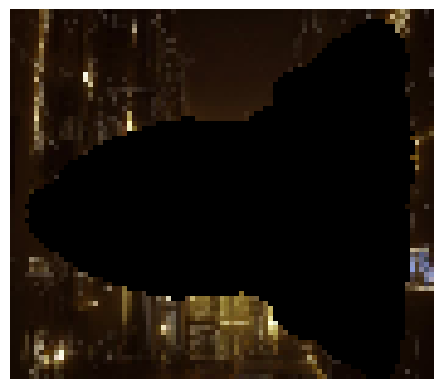

In [102]:
# Use the inverted mask to extract the background
background_masked = cv2.bitwise_and(background, inverted_mask_3channel)
plt.axis('off')
plt.imshow(background_masked)

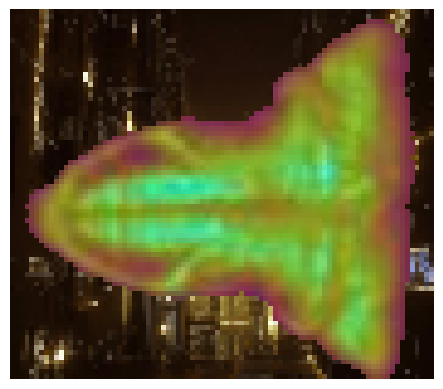

In [103]:
# Combine the masked foreground and background
combined = cv2.add(foreground_masked, background_masked)
plt.axis('off')
plt.imshow(combined)

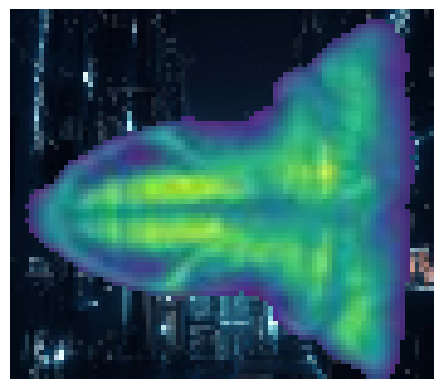

In [104]:
combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(combined_rgb)

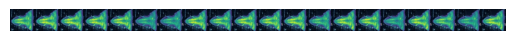

In [25]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Đường dẫn đến thư mục chứa ảnh
image_dir = '/home/minhgiang/image_processing/output/'

# Lấy danh sách tất cả các tệp ảnh có tên bắt đầu bằng 'result_' trong thư mục
image_files = [f for f in os.listdir(image_dir) if f.startswith('result_') and f.endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp'))]

# Danh sách các ảnh
images = [Image.open(os.path.join(image_dir, file)) for file in image_files]

# Kích thước của mỗi ảnh
widths, heights = zip(*(img.size for img in images))

# Tổng kích thước của ảnh ghép
total_width = sum(widths)
max_height = max(heights)

# Tạo ảnh ghép
combined_image = Image.new('RGB', (total_width, max_height))

# Dán từng ảnh vào ảnh ghép
x_offset = 0
for img in images:
    combined_image.paste(img, (x_offset, 0))
    x_offset += img.width

# Hiển thị ảnh ghép
plt.imshow(combined_image)
plt.axis('off')  # Tắt trục
plt.show()
